In [ ]:
# Cell 1: Imports & Setup
import os
import sys

# Add project root to path
sys.path.append("..")

from src import calibration, experiments

# Verify Sampling Rate
FS = calibration.load_calibration()
if FS is None:
    FS = calibration.calibrate_fs_robust()
    calibration.save_calibration(FS)

print(f"✅ System Ready | FS: {FS:.1f} Hz")

📂 Loaded cached calibration: 97859.6 Hz (2026-01-24 12:11:56)
✅ System Ready | FS: 97859.6 Hz


🔹 Starting Oscillator (triangle @ 100.0Hz)...
🔊 Playing triangle @ 100.0Hz...
📸 Capturing Burst...
--- DIAGNOSTICS ---
DC Offset:   1.617 V  (Target: 1.65 V)
Pk-Pk Swing: 0.869 V
🎸 PITCH CHECK: 101.5 Hz (Dominant)
💾 Saved /Users/jacksonferguson/Developer/hardware-builds/oscilloscope-rp2040/data/burst/src_triangle_100Hz_20260125_124229.npz (0.03 MB)
   Metadata keys: ['audio_type', 'shape', 'freq', 'amp', 'measured_freq', 'v_ref', 'adc_bits', 'v_min', 'v_max', 'dc_offset', 'clipped', 'peak_voltage', 'user_notes', 'timestamp']


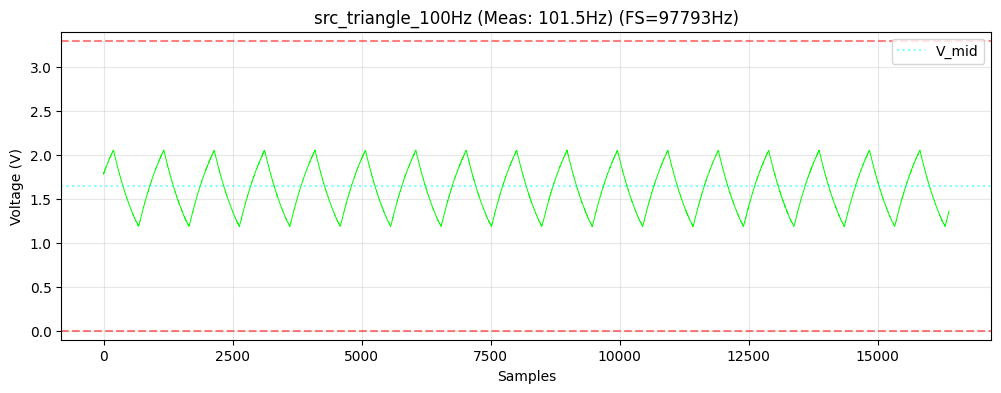

🔇 Audio Stopped.
✅ Capture Complete: src_triangle_100Hz_20260125_124229.npz


In [ ]:
# Cell 2: Set A - Linearity (Triangle)
# CONFIGURATION
FILENAME = "src_triangle_100Hz"
SHAPE = "triangle"
FREQ = 100.0
AMP = 1.0
NOTES = "Laptop Output (Direct). Mid volume."

# EXECUTE
path = experiments.capture_steady_transfer(
    shape=SHAPE, freq=FREQ, amp=AMP, prefix=FILENAME, notes=NOTES
)
print(f"✅ Capture Complete: {os.path.basename(path)}")

In [7]:
# Cell 3: Set B - Bandwidth (Sweep)
# CONFIGURATION
FILENAME = "src_sweep"
F_START = 20.0
F_END = 20000.0
DURATION = 5.0
AMP = 1.0
NOTES = "Laptop Output (Direct). Mid volume. Log sweep."

# EXECUTE
path = experiments.capture_sweep_transfer(
    f_start=F_START,
    f_end=F_END,
    duration=DURATION,
    amp=AMP,
    prefix=FILENAME,
    notes=NOTES,
)
print(f"✅ Capture Complete: {os.path.basename(path)}")

🔹 Generating Sweep (20.0-20000.0Hz, 5.0s)...
🔴 Starting Capture...
💾 Saving Capture...
--- DIAGNOSTICS ---
DC Offset:   1.616 V  (Target: 1.65 V)
Pk-Pk Swing: 0.911 V
💾 Saved /Users/jacksonferguson/Developer/hardware-builds/oscilloscope-rp2040/data/continuous/src_sweep_20260125_124443.npz (0.41 MB)
   Metadata keys: ['audio_type', 'f_start', 'f_end', 'duration', 'amp', 'v_ref', 'adc_bits', 'v_min', 'v_max', 'dc_offset', 'clipped', 'peak_voltage', 'user_notes', 'timestamp']
✅ Capture Complete: src_sweep_20260125_124443.npz


🔹 Starting Oscillator (sine @ 1000.0Hz)...
🔊 Playing sine @ 1000.0Hz...
📸 Capturing Burst...
--- DIAGNOSTICS ---
DC Offset:   1.618 V  (Target: 1.65 V)
Pk-Pk Swing: 0.907 V
🎸 PITCH CHECK: 1002.8 Hz (Dominant)
💾 Saved /Users/jacksonferguson/Developer/hardware-builds/oscilloscope-rp2040/data/burst/src_sine_1kHz_20260125_124507.npz (0.04 MB)
   Metadata keys: ['audio_type', 'shape', 'freq', 'amp', 'measured_freq', 'v_ref', 'adc_bits', 'v_min', 'v_max', 'dc_offset', 'clipped', 'peak_voltage', 'user_notes', 'timestamp']


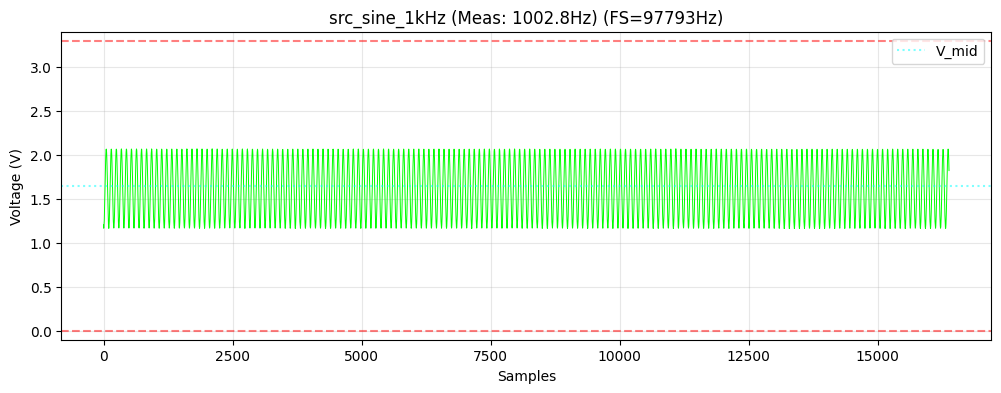

🔇 Audio Stopped.
✅ Capture Complete: src_sine_1kHz_20260125_124507.npz


In [8]:
# Cell 4: Set C - Standard THD (Sine)
# CONFIGURATION
FILENAME = "src_sine_1kHz"
SHAPE = "sine"
FREQ = 1000.0
AMP = 1.0
NOTES = "Laptop Output (Direct). Mid volume. THD Reference."

# EXECUTE
path = experiments.capture_steady_transfer(
    shape=SHAPE, freq=FREQ, amp=AMP, prefix=FILENAME, notes=NOTES
)
print(f"✅ Capture Complete: {os.path.basename(path)}")

### Experimental Methodology: Gain Staging Strategy

**Configuration:**
* **Source:** MacBook Pro DAC @ 100% Volume (0dBFS).
* **Signal:** Digital Amplitude `AMP = 1.0`.
* **Acquisition:** DAQ Analog Front End (AFE) @ 0.5x Gain ($R_{div}$ Voltage Divider).

**Justification:**
1.  **Maximizing SNR (Signal-to-Noise Ratio):** By driving the source at its maximum clean output, we maximize the signal level relative to the fixed noise floor of the transmission line (aux cable) and the thermal noise of the AFE resistors. Attenuating the signal *at the destination* (the DAQ) effectively "turns down" this noise floor along with the signal, yielding the cleanest possible capture.
2.  **Hardware Safety:** The 0.5x input divider ensures that even a full-scale line-level signal ($\approx 2V_{rms} \approx 5.6V_{pp}$) is attenuated to $\approx 2.8V_{pp}$. This provides a safe margin below the RP2040's absolute maximum of $3.6V$, preventing latch-up or diode damage.
3.  **ADC Linearity:** The resulting signal swing stays centered in the ADC's operating window (biased at $1.65V$). This keeps the digitization process in the most linear region of the silicon, avoiding the integral non-linearity (INL) errors often found near the supply rails ($0V$ and $3.3V$).

🔹 Starting Oscillator (triangle @ 100.0Hz)...
🔊 Playing triangle @ 100.0Hz...
📸 Capturing Burst...
--- DIAGNOSTICS ---
DC Offset:   1.625 V  (Target: 1.65 V)
Pk-Pk Swing: 1.957 V
🎸 PITCH CHECK: 101.5 Hz (Dominant)
   Harmonics:  399.9 Hz
💾 Saved /Users/jacksonferguson/Developer/hardware-builds/oscilloscope-rp2040/data/burst/llama_triangle_100Hz_20260125_125545.npz (0.04 MB)
   Metadata keys: ['audio_type', 'shape', 'freq', 'amp', 'measured_freq', 'v_ref', 'adc_bits', 'v_min', 'v_max', 'dc_offset', 'clipped', 'peak_voltage', 'user_notes', 'timestamp']


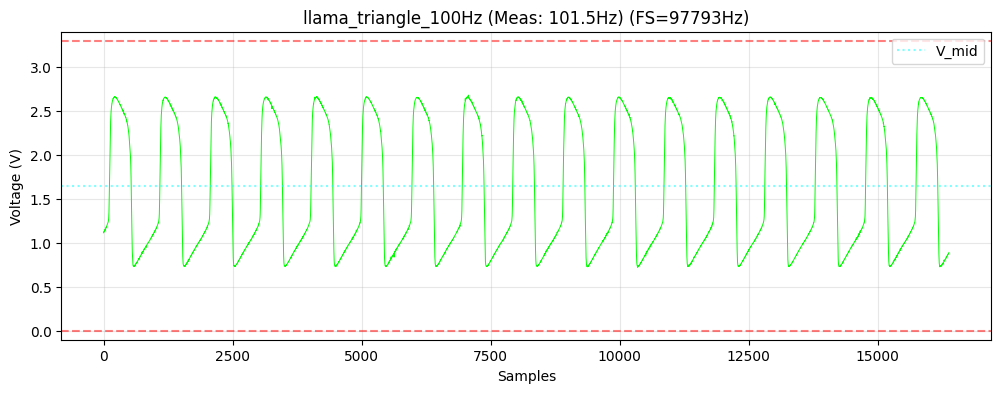

🔇 Audio Stopped.
✅ Capture Complete: llama_triangle_100Hz_20260125_125545.npz


In [9]:
# CONFIGURATION
FILENAME = "llama_triangle_100Hz"
SHAPE = "triangle"
FREQ = 100.0
AMP = 0.1  # Reduced to accommodate ~30dB pedal gain
NOTES = "Red Llama Output. Max Gain. Amp reduced to prevent ADC clipping."

# EXECUTE
path = experiments.capture_steady_transfer(
    shape=SHAPE, freq=FREQ, amp=AMP, prefix=FILENAME, notes=NOTES
)
print(f"✅ Capture Complete: {os.path.basename(path)}")

In [10]:
# CONFIGURATION
FILENAME = "llama_sweep"
F_START = 20.0
F_END = 20000.0
DURATION = 5.0
AMP = 0.1  # Reduced to accommodate ~30dB pedal gain
NOTES = "Red Llama Output. Max Gain. Log sweep."

# EXECUTE
path = experiments.capture_sweep_transfer(
    f_start=F_START,
    f_end=F_END,
    duration=DURATION,
    amp=AMP,
    prefix=FILENAME,
    notes=NOTES,
)
print(f"✅ Capture Complete: {os.path.basename(path)}")

🔹 Generating Sweep (20.0-20000.0Hz, 5.0s)...
🔴 Starting Capture...
💾 Saving Capture...
--- DIAGNOSTICS ---
DC Offset:   1.612 V  (Target: 1.65 V)
Pk-Pk Swing: 2.270 V
💾 Saved /Users/jacksonferguson/Developer/hardware-builds/oscilloscope-rp2040/data/continuous/llama_sweep_20260125_125640.npz (0.41 MB)
   Metadata keys: ['audio_type', 'f_start', 'f_end', 'duration', 'amp', 'v_ref', 'adc_bits', 'v_min', 'v_max', 'dc_offset', 'clipped', 'peak_voltage', 'user_notes', 'timestamp']
✅ Capture Complete: llama_sweep_20260125_125640.npz


🔹 Starting Oscillator (sine @ 1000.0Hz)...
🔊 Playing sine @ 1000.0Hz...
📸 Capturing Burst...
--- DIAGNOSTICS ---
DC Offset:   1.615 V  (Target: 1.65 V)
Pk-Pk Swing: 1.773 V
🎸 PITCH CHECK: 1002.8 Hz (Dominant)
   Harmonics:  3002.3, 1999.6, 4005.1, 6004.6 Hz
💾 Saved /Users/jacksonferguson/Developer/hardware-builds/oscilloscope-rp2040/data/burst/llama_sine_1kHz_20260125_125702.npz (0.03 MB)
   Metadata keys: ['audio_type', 'shape', 'freq', 'amp', 'measured_freq', 'v_ref', 'adc_bits', 'v_min', 'v_max', 'dc_offset', 'clipped', 'peak_voltage', 'user_notes', 'timestamp']


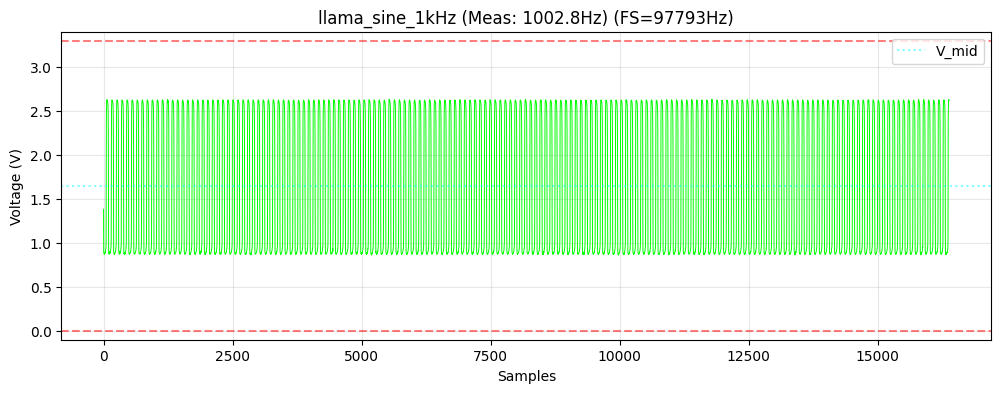

🔇 Audio Stopped.
✅ Capture Complete: llama_sine_1kHz_20260125_125702.npz


In [11]:
# CONFIGURATION
FILENAME = "llama_sine_1kHz"
SHAPE = "sine"
FREQ = 1000.0
AMP = 0.1  # Reduced to accommodate ~30dB pedal gain
NOTES = "Red Llama Output. Max Gain. THD Reference."

# EXECUTE
path = experiments.capture_steady_transfer(
    shape=SHAPE, freq=FREQ, amp=AMP, prefix=FILENAME, notes=NOTES
)
print(f"✅ Capture Complete: {os.path.basename(path)}")

### Note on Frequency Precision: Bin Quantization vs. Interpolation

You may observe that the measured frequency (e.g., `1002.8 Hz`) differs slightly from the target frequency (e.g., `1000.0 Hz`). This is an expected artifact of the Discrete Fourier Transform (DFT) known as **Bin Quantization**, not a calibration error.

**Why we use `argmax` instead of Weighted Average Interpolation:**

1.  **Robustness over Precision:**
    * **Weighted Average** algorithms are highly sensitive to noise and spectral asymmetry. In real-world transfer function measurements, noise or minor intermodulation distortion can skew the center of mass, leading to "precise but wrong" readings.
    * **`np.argmax`** provides a robust, noise-immune integer bin index. For identifying dominant harmonics (which are spaced hundreds of Hertz apart), absolute stability is more valuable than sub-Hertz granularity.

2.  **Honest Resolution Reporting:**
    * With a sample rate of $\approx 97.8\text{kHz}$ and a buffer of $16,384$ samples, our frequency resolution is fixed at $\Delta f \approx 5.97\text{Hz}$.
    * Reporting the bin center (e.g., $1002.8\text{Hz}$) accurately reflects the fundamental resolution limit of the system. Interpolating to a value like $1000.1\text{Hz}$ would imply a level of precision that exceeds the physical noise floor and jitter specifications of the RP2040 ADC.